<a href="https://colab.research.google.com/github/Tai-Rocha/Python_Init/blob/main/Height_Farms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

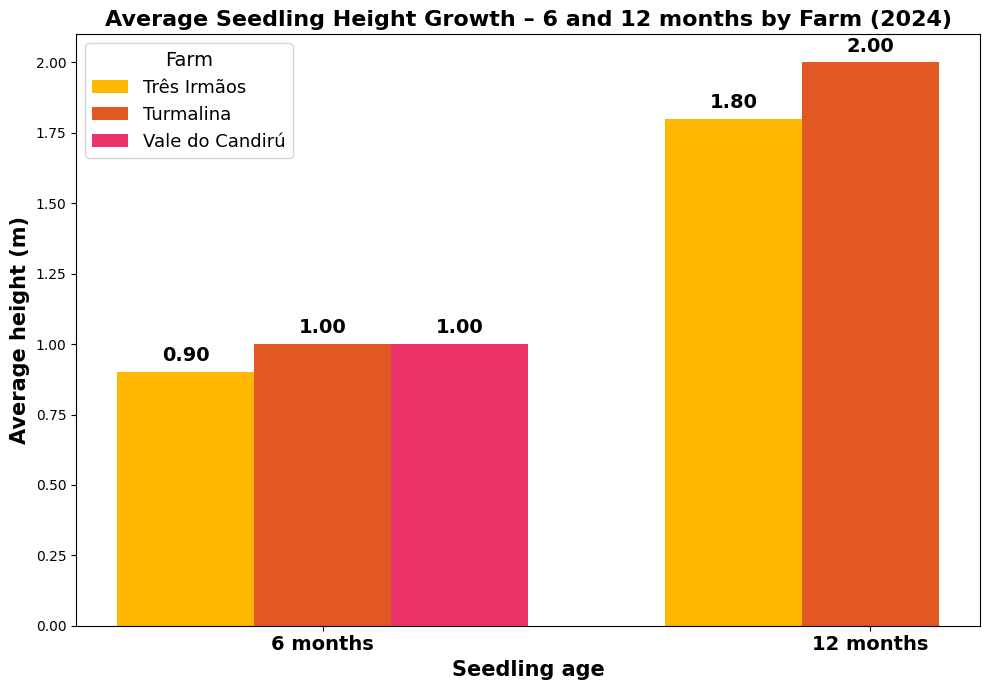

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Manual data (as per your correction)
data = {
    'Farm': ['Turmalina', 'Três Irmãos', 'Vale do Candirú'],
    '6 months height (m)': [1.0, 0.9, 1.0],
    '12 months height (m)': [2.0, 1.8, None]
}
df = pd.DataFrame(data)

# Farm order and colors (same as your example image)
order_farms = ['Três Irmãos', 'Turmalina', 'Vale do Candirú']
color_map = {
    'Três Irmãos': '#ffb700',    # yellow
    'Turmalina': '#e25822',      # orange
    'Vale do Candirú': '#eb3269' # magenta
}

# Transform to long format
df_long = df.melt(id_vars=['Farm'],
                  value_vars=['6 months height (m)', '12 months height (m)'],
                  var_name='Age', value_name='Height')
df_long['Age'] = df_long['Age'].replace({
    '6 months height (m)': '6 months',
    '12 months height (m)': '12 months'
})

# Ensure all combinations present (for proper plot)
idx = pd.MultiIndex.from_product([order_farms, ['6 months', '12 months']], names=['Farm', 'Age'])
df_long = df_long.set_index(['Farm', 'Age']).reindex(idx).reset_index()

x = np.arange(len(df_long['Age'].unique()))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 7))

for i, farm in enumerate(order_farms):
    data = df_long[df_long['Farm'] == farm]
    positions = x + (i - 1) * width
    bars = ax.bar(positions, data['Height'], width, label=farm, color=color_map[farm])
    for bar in bars:
        if not np.isnan(bar.get_height()):
            ax.annotate(f'{bar.get_height():.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_xlabel('Seedling age', fontsize=15, fontweight='bold')
ax.set_ylabel('Average height (m)', fontsize=15, fontweight='bold')
ax.set_title('Average Seedling Height Growth – 6 and 12 months by Farm (2024)', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['6 months', '12 months'], fontsize=14, fontweight='bold')
ax.legend(title='Farm', fontsize=13, title_fontsize=14, loc='upper left')
plt.tight_layout()

# Save and display
plt.savefig("average_seedling_height_growth_6_12_months.png", dpi=300)
plt.show()
